# Data Analysis & Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System Feb, 2020

# Investigation Overview

In this investigation, I will to look at the bike ride trends and biker type of the bay Area bike share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.

# Dataset Overview

This document explores the Ford GoBike's trip data for public containing bike rides from Feb 2020. The attributes included the trip start/end time, as well as additional measurements such as user type and rental access method.First data should be cleaned to avoid Data inconsistent, or outliner issues.

# Research Questions

1.When are most trips taken in terms of time of day or day of the week?<br>

2.How long does the average trip take?<br>

3.Does the above depend on if a user is a subscriber or customer?<br>

4.Most common and least common start and end trip stations?<br>

5.Which Bikes models are used most and least?<br>

# Data Wranggling

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('202002-baywheels-tripdata.csv')

C:\Users\Naveen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
duration_sec               432354 non-null int64
start_time                 432354 non-null object
end_time                   432354 non-null object
start_station_id           161723 non-null float64
start_station_name         161723 non-null object
start_station_latitude     432354 non-null float64
start_station_longitude    432354 non-null float64
end_station_id             162194 non-null float64
end_station_name           162194 non-null object
end_station_latitude       432354 non-null float64
end_station_longitude      432354 non-null float64
bike_id                    432354 non-null int64
user_type                  432354 non-null object
rental_access_method       317843 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 46.2+ MB


# Cleaning Data

In [4]:
#Drop Null values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [5]:
# Modify Data types

df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')
df['bike_id'] = df['bike_id'].astype('float').astype('int').astype('str')

In [6]:
#Convert start time and end time to dataframe format
df['start_station_id'] = df['start_station_id'].astype('int').astype('str')
df['end_station_id'] = df['end_station_id'].astype('float').astype('int').astype('str')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516 entries, 0 to 14515
Data columns (total 14 columns):
duration_sec               14516 non-null int64
start_time                 14516 non-null object
end_time                   14516 non-null object
start_station_id           14516 non-null object
start_station_name         14516 non-null object
start_station_latitude     14516 non-null float64
start_station_longitude    14516 non-null float64
end_station_id             14516 non-null object
end_station_name           14516 non-null object
end_station_latitude       14516 non-null float64
end_station_longitude      14516 non-null float64
bike_id                    14516 non-null object
user_type                  14516 non-null object
rental_access_method       14516 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 1.6+ MB


In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [9]:
# Add 'duration' column

def minCount(dates):
    return (round((dates.seconds/60)))

def hourCount(dates):
    return (round((dates.seconds/60)/60, 2))

df['duration'] = df['end_time'] - df['start_time']

dates = df['duration'].abs()
dates = dates.map(minCount)
df['duration_min'] = dates

dates = df['duration'].abs()
dates = dates.map(hourCount)
df['duration_hour'] = dates

In [10]:
df['latitude_diff'] = df['start_station_latitude'] - df['end_station_latitude']

df['longitude_diff'] = df['start_station_longitude'] - df['end_station_longitude']

In [11]:
# Adding Month, Day and Hour of tweets and retweets

df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour


df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hour'] = df['end_time'].dt.hour

In [12]:
df = df[(df['latitude_diff']<1) & (df['latitude_diff']>-1)]

# Explanatory Data Analysis

In [13]:
base_color = sb.color_palette()[0]

Standard plot for the no of trips based on the duration in hours
We want to have a overview of the time duration which is taken for any random trip taking place.
1. After plotting the graph on a logarithmic scale, we can see that the graph is similar to normal curve.
2. We can see that the peak is at the point slightly less than 0.2 and the graph is more like the normal curve but is skewed slightly to the right.

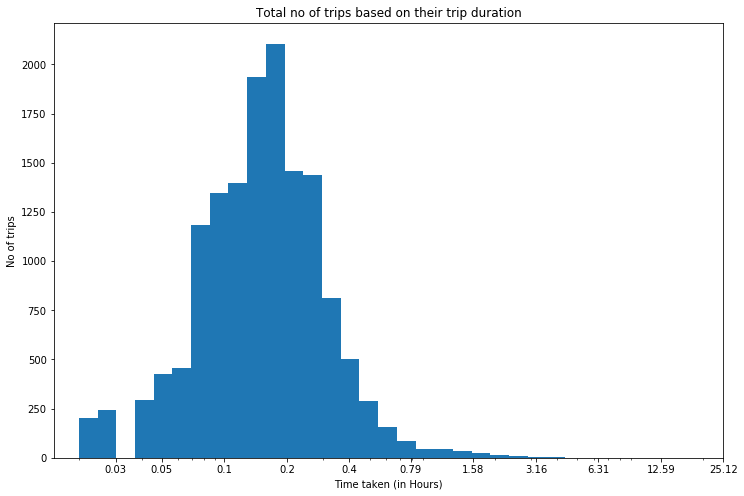

In [24]:
binsize = .1
log_binsize = 0.09
bins = 10 ** np.arange(-1.7, np.log10(df['duration_hour'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df, x = 'duration_hour', bins = bins)

plt.xscale('log')
bins = np.around(10 ** np.arange(-1.6, 1.5, .3), 2)
plt.xticks(bins, bins)
plt.xlabel('Time taken (in Hours)')
plt.ylabel('No of trips')
plt.title('Total no of trips based on their trip duration');
plt.show()

# Lets see the most common start stations

Most popular station will help us in knowing the station from where most of the trips are started. With this representation we could see that Berry st at 4th station is the most common start station followed by Howard St at Beale Station

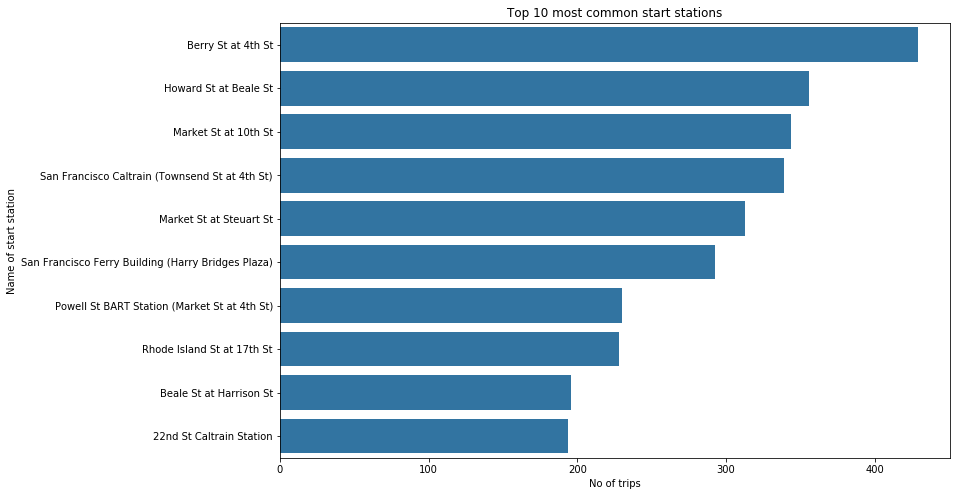

In [28]:
neighbourhood_counts = df['start_station_name'].value_counts()
neighbourhood_order = neighbourhood_counts.index
plt.figure(figsize=[12, 8])
sb.countplot(data = df, y = 'start_station_name', order = neighbourhood_order[:10], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 most common start stations');

# Lets see the most common end stations

Least popular station will help us in knowing the station from where low nuber of the trips are started. Willow,stockton,balboa,quesada,gish,Divisadero,Bird,Egbert,5th Taylor,17th santa clara are the stations who have least ending rides

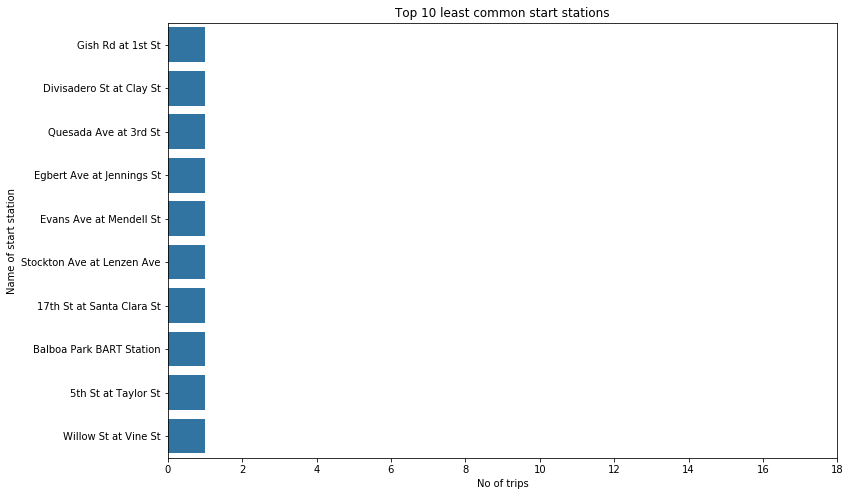

In [29]:
least_counts = df['start_station_name'].value_counts()
least_order = least_counts.index
plt.figure(figsize=[12, 8])
sb.countplot(data = df, y = 'start_station_name', order = least_order[-10:], color=base_color)
plt.xlabel('No of trips')
plt.ylabel('Name of start station')
plt.title('Top 10 least common start stations');
x_labels = np.arange(0, 19, 2)
plt.xticks(x_labels, x_labels);

# Let see the distribution of rental access method with user type

With following representation we could see that subscriber has booked more rides compare to customers.

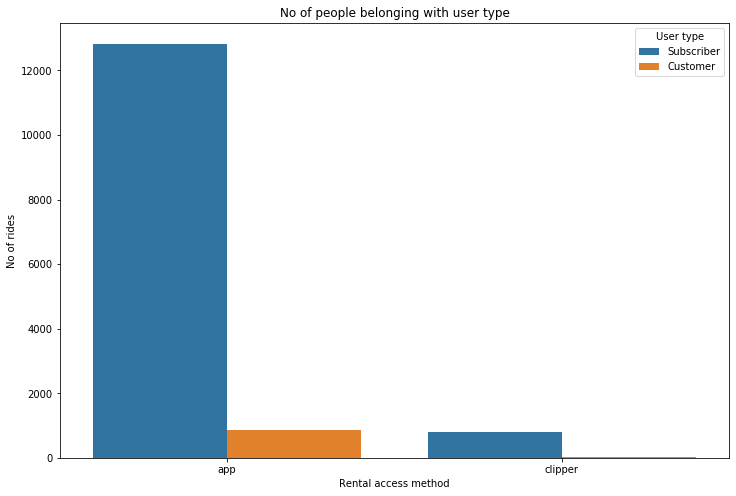

In [35]:
plt.figure(figsize=[12, 8])
sb.countplot(data=df,x= 'rental_access_method', hue='user_type');
plt.xlabel('Rental access method')
plt.ylabel('No of rides')
plt.title('No of people belonging with user type')
plt.legend(title='User type');

# Month Wise rides booking visualization 

With the represenation we could see that maximum booking done in Month of February because of vacation Time.

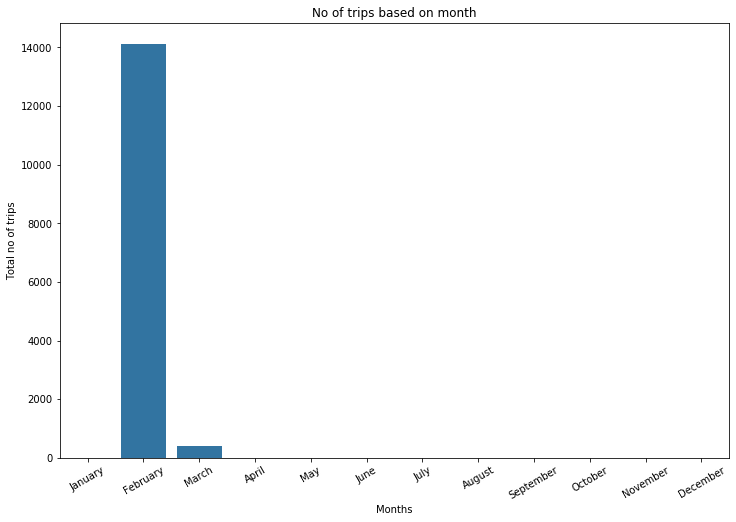

In [36]:
x_marker = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
            'November', 'December']
plt.figure(figsize=[12, 8])
sb.countplot(data=df, x='start_month', order=x_marker, color=base_color);
plt.xticks(rotation=30)
plt.title('No of trips based on month')
plt.xlabel('Months')
plt.ylabel('Total no of trips');

# Variation based on the day of Week

We could see that most of the rides ended on Friday and least at Saturday 

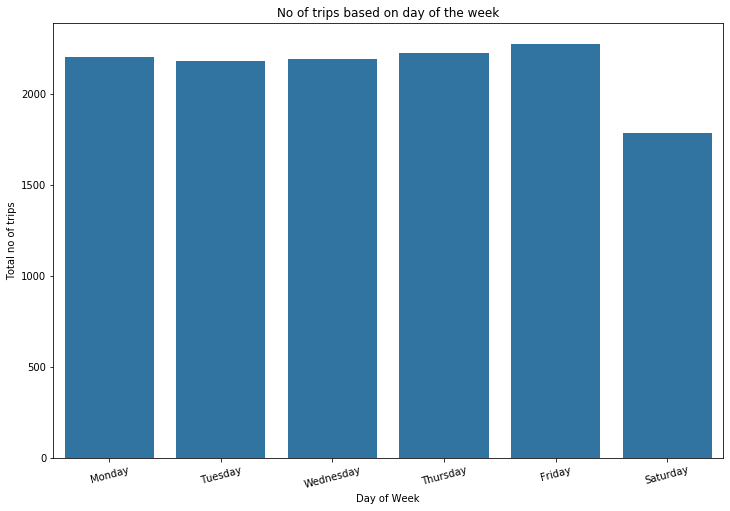

In [37]:
x_marker = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday']
plt.figure(figsize=[12, 8])
sb.countplot(data=df, x='end_day', order=x_marker, color=base_color);
plt.title('No of trips based on day of the week')
plt.xlabel('Day of Week')
plt.xticks(rotation=15)
plt.ylabel('Total no of trips');

# Final Observations

1.It shows that most of the trip duration takes less than 2 days<br>
2.we could see that Berry st at 4th station is the most common start station followed by Howard St at Beale Station.<br>
3.we could see that San Francisco Caltrain(Townsend st at 4th st) is most popular end station.<br>
4.we could see that subscriber has booked more rides compare to customers<br>
5.we could see that maximum booking done in Month of February because of vacation Time<br>
6.most of the rides ended on Friday and least at Saturday <br>
7.we could see that most of the trips are done in morning timing.<br>
8.In afternoon we couldn't see any hike and before 5 AM there is almost less trips<br>
9.We could see that bike id (478196 and 104154) are most booked bikes more than 20 rides<br>
10.we see that Subsscriber dominates in the user type